In [26]:
import os

import pandas as pd
import numpy as np

import seaborn as sns; sns.set()

In [27]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

In [28]:
DATA_DIR = '../Chapter_5_Integration_with_Other_Programming_Languages/files'
DATA_FILE = os.path.join(DATA_DIR, 'all_claims_files.csv')

In [29]:
df = pd.read_csv(DATA_FILE)

In [30]:
df.BENE_BIRTH_DT = pd.to_datetime(df.BENE_BIRTH_DT.astype(str))
df.BENE_DEATH_DT = pd.to_datetime(df.BENE_DEATH_DT.astype(str).str.slice(0, 8))

In [31]:
df['TOTAL_PAID'] = df.MEDREIMB_IP + df.MEDREIMB_OP + df.MEDREIMB_CAR

In [32]:
df = df.loc[df['TOTAL_PAID']>0, :] # Filter to claimants only

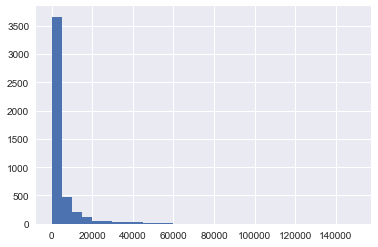

In [33]:
df.TOTAL_PAID.hist(bins=30);

In [34]:
df['TOTAL_LOG_PAID'] = np.log(df['TOTAL_PAID'])

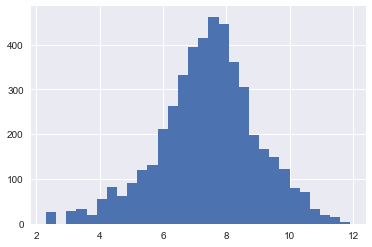

In [35]:
# Log transform converts skewed healthcare paid distribution to a normal distribution
df.TOTAL_LOG_PAID.hist(bins=30);

# Discretize the total paid outcome variable

In [36]:
# High-cost threshold needed for classification problem
threshold = df.TOTAL_PAID.quantile(.9)

In [37]:
df['HIGH_COST'] = df.TOTAL_PAID.map(lambda x: 1 if x>=threshold else 0)

# Handle categorical values for the explanatory variables

In [38]:
gender_ind = pd.get_dummies(df.BENE_SEX_IDENT_CD, drop_first=True, prefix='gender')
df = df.merge(gender_ind, left_index=True, right_index=True)

In [39]:
esrd_ind = pd.get_dummies(df.BENE_ESRD_IND, drop_first=True, prefix='ESRD')
df = df.merge(esrd_ind, left_index=True, right_index=True)

In [40]:
disease_df = df[['SP_ALZHDMTA','SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN','SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']]

In [41]:
code_mapping = {2:0, 1:1}

In [42]:
df[['SP_ALZHDMTA','SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN','SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']] = disease_df.applymap(lambda x: code_mapping[x])

In [43]:
df.to_pickle('claims_df')